<b> A complete guide: https://scikit-learn.org/stable/modules/clustering.html </b>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("../data/iris.csv",skipinitialspace=True)

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
cols = [col for col in df.columns if col != 'class']

X = df[cols].values

scaler = StandardScaler()
X_scal = scaler.fit_transform(X)

[]

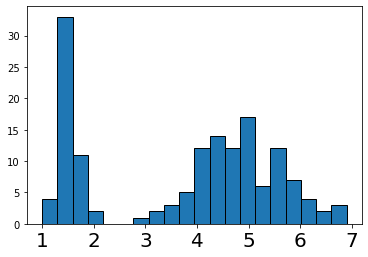

In [6]:
plt.hist(X[:,2], edgecolor='black', bins=20)
plt.xticks(fontsize=20)
plt.plot()

[]

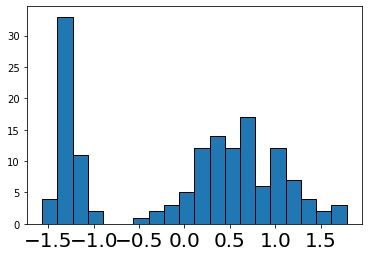

In [7]:
plt.hist(X_scal[:,2], edgecolor='black', bins=20)
plt.xticks(fontsize=20)
plt.plot()

In [8]:
scaler = MinMaxScaler()
X_scal = scaler.fit_transform(X)

[]

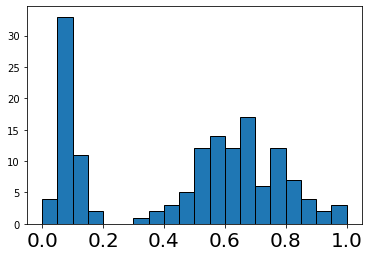

In [9]:
plt.hist(X_scal[:,2], edgecolor='black', bins=20)
plt.xticks(fontsize=20)
plt.plot()

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [45]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=100)
kmeans.fit(X_scal)

KMeans(max_iter=100, n_clusters=3)

In [46]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

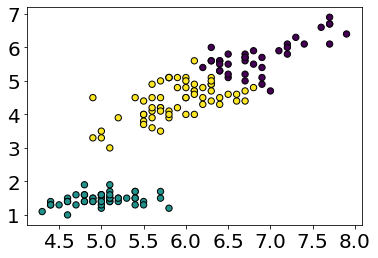

In [47]:
#plt.scatter(df['sepal length'], df['petal length'], c=kmeans.labels_, s=40, edgecolor='black')
plt.scatter(X[:,0], X[:,2], c=kmeans.labels_, s=40, edgecolor='black')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [48]:
kmeans.cluster_centers_

array([[0.70726496, 0.4508547 , 0.79704476, 0.82478632],
       [0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033]])

In [49]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

In [50]:
centers

array([[6.84615385, 3.08205128, 5.7025641 , 2.07948718],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88852459, 2.73770492, 4.39672131, 1.41803279]])

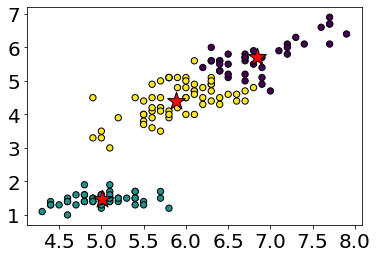

In [51]:
plt.scatter(X[:,0], X[:,2], c=kmeans.labels_, s=40, edgecolor='black')
plt.scatter(centers[:,0], centers[:,2], s=350, marker='*', c='red', edgecolor='black')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

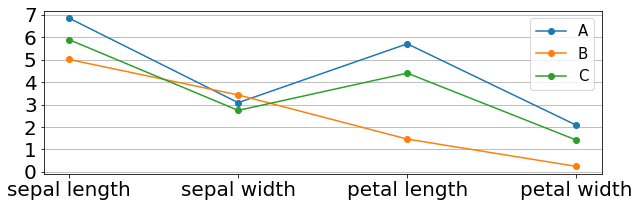

In [52]:
plt.figure(figsize=(10, 3))

clust_name = ['A', 'B', 'C']
for i in range(0, len(centers)):
    #plt.plot(centers[i], marker='o', label='Cluster %s' % i)
    plt.plot(centers[i], marker='o', label=clust_name[i])
    
plt.xticks(range(0, len(cols)), cols, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='y')
plt.legend(fontsize=15, loc='best')

plt.show()

[]

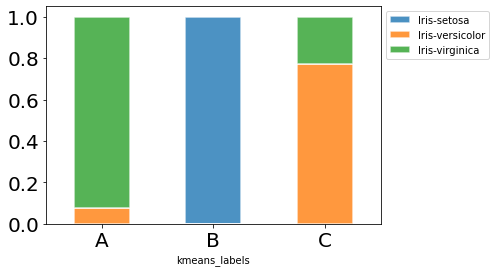

In [53]:
df['kmeans_labels'] = kmeans.labels_ 
bar_pl = df['class'].groupby(df['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))
plt.plot()

In [54]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([39, 50, 61], dtype=int64))

In [55]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(X, kmeans.labels_))

SSE 6.982216473785234
Silhouette 0.5495805406956198


In [56]:
sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_scal)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

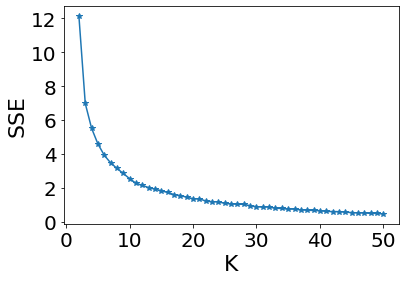

In [57]:
plt.plot(range(2, len(sse_list) + 2), sse_list, marker='*')
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [58]:
from sklearn.cluster import DBSCAN

In [79]:
dbscan = DBSCAN(eps=0.15, min_samples=5)
dbscan.fit(X_scal)

DBSCAN(eps=0.15)

In [80]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

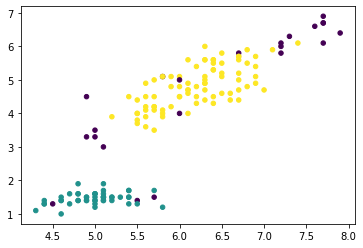

In [83]:
plt.scatter(df['sepal length'], df['petal length'], c=dbscan.labels_, s=20)
plt.show()

In [84]:
from scipy.spatial.distance import pdist, squareform

In [85]:
dist = pdist(X_scal, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

[0.21561354 0.16810102 0.21761244 ... 0.226928   0.18710825 0.28409587]

[[0.         0.21561354 0.16810102 ... 1.08257132 1.14907064 0.96462829]
 [0.21561354 0.         0.10157824 ... 1.08390691 1.17619813 0.95649502]
 [0.16810102 0.10157824 0.         ... 1.12088708 1.19544459 0.98859665]
 ...
 [1.08257132 1.08390691 1.12088708 ... 0.         0.226928   0.18710825]
 [1.14907064 1.17619813 1.19544459 ... 0.226928   0.         0.28409587]
 [0.96462829 0.95649502 0.98859665 ... 0.18710825 0.28409587 0.        ]]


In [86]:
dist[0]

array([0.        , 0.21561354, 0.16810102, 0.21761244, 0.0500771 ,
       0.2103619 , 0.15087195, 0.05286766, 0.3167154 , 0.18134934,
       0.11906369, 0.09914459, 0.22821773, 0.31162007, 0.28698522,
       0.41908769, 0.20482661, 0.04166667, 0.21845904, 0.13284722,
       0.10614151, 0.11906369, 0.16007066, 0.15860299, 0.12594602,
       0.21289311, 0.1029624 , 0.03254042, 0.0500771 , 0.17064517,
       0.18939725, 0.12614386, 0.25552884, 0.31211396, 0.17649779,
       0.13246018, 0.11239641, 0.08098544, 0.28547976, 0.04498205,
       0.05286766, 0.52896235, 0.23177773, 0.17233246, 0.17248562,
       0.22821773, 0.12951485, 0.18685589, 0.10157824, 0.08784105,
       0.92575133, 0.8458718 , 0.96077621, 0.81646322, 0.90767568,
       0.77394235, 0.8781654 , 0.65419631, 0.8604353 , 0.73581847,
       0.79321841, 0.78192769, 0.81314879, 0.8381537 , 0.65642979,
       0.85665339, 0.79508853, 0.68516673, 0.97787517, 0.71629068,
       0.91735524, 0.75265959, 0.96438341, 0.80540809, 0.80284

In [87]:
k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

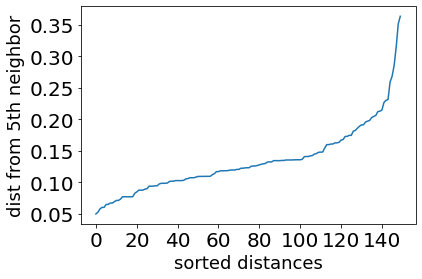

In [88]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [89]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

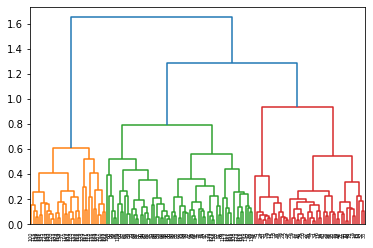

In [90]:
data_dist = pdist(X_scal, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0)

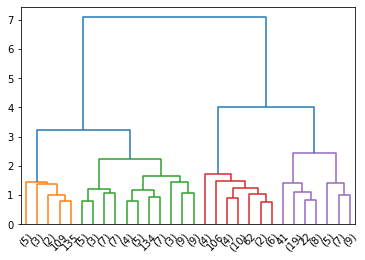

In [91]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=3, truncate_mode='lastp')

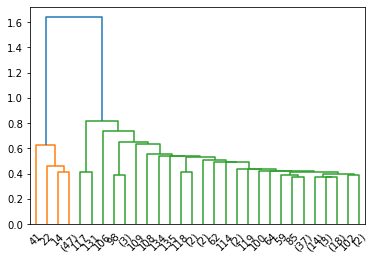

In [92]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

In [93]:
from sklearn.cluster import AgglomerativeClustering

In [94]:
hier = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
hier.fit(X_scal)

AgglomerativeClustering(linkage='single')

In [95]:
hier.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

[]

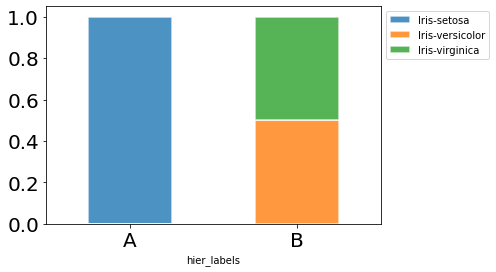

In [97]:
df['hier_labels'] = hier.labels_ 
bar_pl = df['class'].groupby(df['hier_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

clust_name = ['A', 'B']
plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))
plt.plot()

In [98]:
hier = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete')
hier.fit(dist)

AgglomerativeClustering(affinity='precomputed', linkage='complete',
                        n_clusters=3)

[]

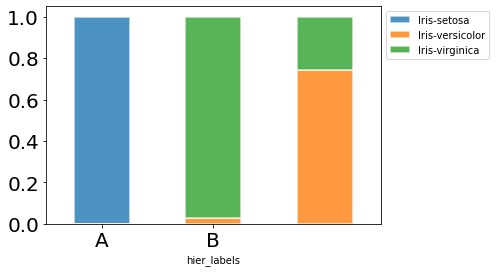

In [99]:
df['hier_labels'] = hier.labels_ 
bar_pl = df['class'].groupby(df['hier_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))
plt.plot()

In [100]:
hier = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='single')
hier.fit(dist)

AgglomerativeClustering(affinity='precomputed', linkage='single')

[]

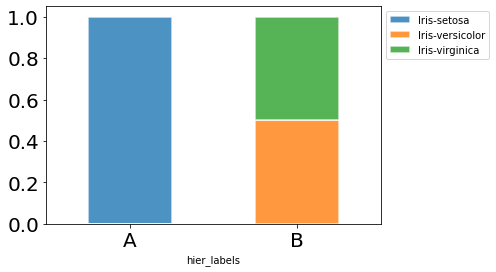

In [101]:
df['hier_labels'] = hier.labels_ 
bar_pl = df['class'].groupby(df['hier_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))
plt.plot()